In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split


In [6]:
## Replace 'path_to_csv' with the actual path to the CSV file
metadata = pd.read_csv('HAM10000_metadata.csv')
print(metadata.head(10))

     lesion_id      image_id   dx dx_type   age     sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0    male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0    male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0    male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0    male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0    male          ear
5  HAM_0001466  ISIC_0027850  bkl   histo  75.0    male          ear
6  HAM_0002761  ISIC_0029176  bkl   histo  60.0    male         face
7  HAM_0002761  ISIC_0029068  bkl   histo  60.0    male         face
8  HAM_0005132  ISIC_0025837  bkl   histo  70.0  female         back
9  HAM_0005132  ISIC_0025209  bkl   histo  70.0  female         back


Index(['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization'], dtype='object')


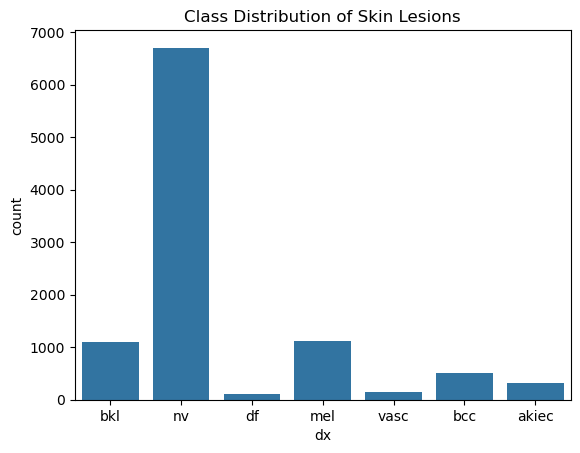

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (replace 'your_dataset_path.csv' with the actual file path)
df = pd.read_csv('HAM10000_metadata.csv')

# Check if the 'dx' column exists
print(df.columns)

# Plot the class distribution of skin lesions
sns.countplot(x='dx', data=df)
plt.title('Class Distribution of Skin Lesions')
plt.show()



In [15]:
import pandas as pd
import os
import cv2

df = pd.read_csv('HAM10000_metadata.csv') 

image_dir = '/Users/sajallaha/Downloads/scdatasets/images'


image_size = 128
def load_and_preprocess_image(file_path):
    image = cv2.imread(file_path)
    if image is None:
        print(f'Failed to load image: {file_path}')
        return None
    else:
        image = cv2.resize(image, (image_size, image_size))
        return image / 255.0


images = [load_and_preprocess_image(os.path.join(image_dir, f'{img_id}.jpg')) for img_id in df['image_id']]
for img_id in df['image_id'].head(5): 
    file_path = os.path.join(image_dir, f'{img_id}.jpg')
    print(f'Trying to load: {file_path}')
    image = load_and_preprocess_image(file_path)
    if image is None:
        print(f'Failed to load image: {file_path}')


Trying to load: /Users/sajallaha/Downloads/scdatasets/images/ISIC_0027419.jpg
Trying to load: /Users/sajallaha/Downloads/scdatasets/images/ISIC_0025030.jpg
Trying to load: /Users/sajallaha/Downloads/scdatasets/images/ISIC_0026769.jpg
Trying to load: /Users/sajallaha/Downloads/scdatasets/images/ISIC_0025661.jpg
Trying to load: /Users/sajallaha/Downloads/scdatasets/images/ISIC_0031633.jpg


In [19]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(df['dx'])  # Encode target labels
labels = to_categorical(labels, num_classes=7)  # Convert to one-hot encoding (7 classes)


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

model = Sequential([
    Input(shape=(64, 64, 3)),  # Input layer
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [76]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [66]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")



X_train shape: (8012, 128, 128, 3)
y_train shape: (8012, 7)


In [ ]:
from tensorflow.keras.layers import Flatten

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())


model.add(Dense(128, activation='relu'))
model.add(Dense(7, activation='softmax')) 


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()


model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(7, activation='softmax')) 

# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 109s 421ms/step - accuracy: 0.6619 - loss: 1.1306 - val_accuracy: 0.6690 - val_loss: 0.8997
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 99s 391ms/step - accuracy: 0.6854 - loss: 0.8369 - val_accuracy: 0.6940 - val_loss: 0.8146
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 100s 396ms/step - accuracy: 0.7118 - loss: 0.7800 - val_accuracy: 0.7099 - val_loss: 0.8023
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 96s 383ms/step - accuracy: 0.7484 - loss: 0.6959 - val_accuracy: 0.7114 - val_loss: 0.7731
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 85s 339ms/step - accuracy: 0.7639 - loss: 0.6459 - val_accuracy: 0.7219 - val_loss: 0.7712
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 82s 327ms/step - accuracy: 0.7834 - loss: 0.5704 - val_accuracy: 0.7254 - val_loss: 0.7673
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 85s 337ms/step - accuracy: 0.8093 - loss: 0.5006 - val_accuracy: 0.7199 - val_loss: 0.7565
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 81s 323ms/step - accuracy: 0.8330 - loss:

In [69]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.7034 - loss: 0.8405
Test accuracy: 0.720918595790863


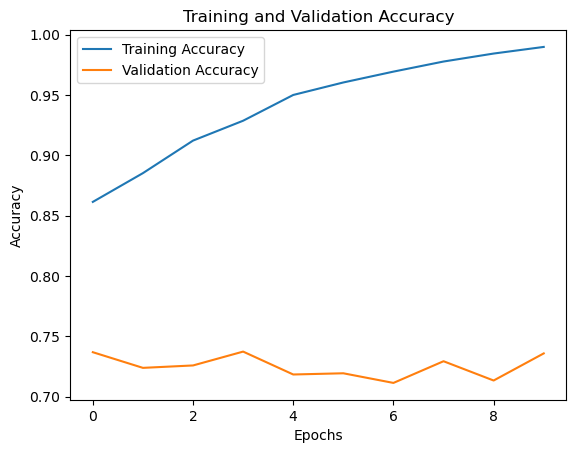

In [46]:
import matplotlib.pyplot as plt

# Assuming 'history' is the result from model.fit
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step


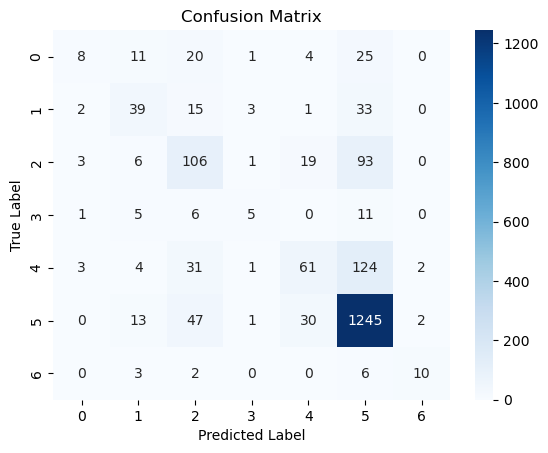

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [49]:
model.save('skin_cancer_detection_model.keras')